In [2]:
%reload_ext autoreload
%autoreload 2

import time
import json
import os
import shutil
import copy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

import utils as ut
import plot_utils as pu

First get the positions fo the main bodies. Here I use initial conditions for a Figure Eight orbit. here I use the class NBodySimulation (to be found in utils.py) to integrate the orbits. 

Period: 6.325897
Timestep: 0.010543161666666667
99.83%
Shape of positions array: (600, 2, 3)


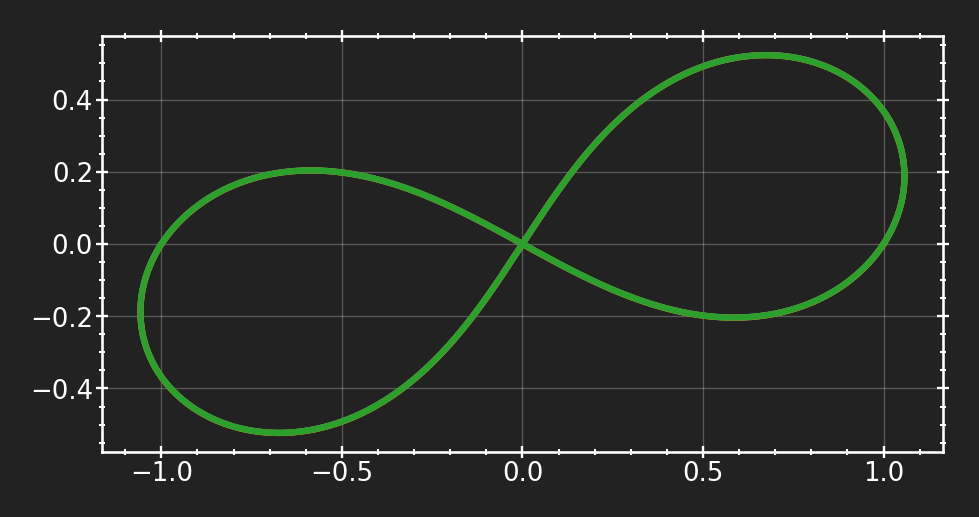

In [7]:
initial_conditions_file = '../data/periodic_3b_inits/inits.json'
with open(initial_conditions_file, 'r') as f:
    initial_conditions = json.load(f)

orbit = 'Figure Eight'
inits = initial_conditions[orbit]

T = inits['period']
masses = [inits[str(i)]['mass'] for i in range(3)]
bodies = [ut.Body(inits[str(i)]['mass'],
                  inits[str(i)]['pos'][:2],
                  inits[str(i)]['vel'][:2]) for i in range(3)]

FRAMES = 600
dt = T/FRAMES
print(f'Period: {T}')
print(f'Timestep: {dt}')

sim = ut.NBodySimulation(bodies, e=0.0)
sim.run_simulation(T, dt)
pos = sim.positions
print('\nShape of positions array: ' + str(pos.shape))

# Checking the orbit
sim.simple_plot()

Define parameteres for generating the fractal

In [11]:
radii = np.array([1, 1, 1])*0.1  # radii of the bodies

r = 1.5 # range of the grid, from -r to r in both x and y
N = 50  # number of grid points in X
M = 50  # number of grid points in Y

n_periods = 2  # number of periods integrate test particle orbits
I = 600 * n_periods  # number of max iterations

# Where to save the data
motherfold = f'../results/figure_eight_{N}_{M}/'
save_ind_fold = motherfold + f'indices/'
save_alpha_fold = motherfold + f'time_hit/'
if not os.path.exists(save_ind_fold):
    os.makedirs(save_ind_fold)
if not os.path.exists(save_alpha_fold):
    os.makedirs(save_alpha_fold)

In [ ]:
for frame_start in range(0, 600):

    basin = ut.BasinFractal(masses, radii, pos)
    basin.set_grid(N, M, r, r)

    basin.run(dt, max_iters=I, frame_start=frame_start)

    hit_time = basin.hit_time.T[::-1, :]  # array of times where particles hit a body
    indices = basin.hit_indices.T[::-1, :]  # array of indices of the bodies hit

    np.save(save_ind_fold + f'indices_{frame_start:04d}.npy', indices)
    np.save(save_alpha_fold + f'alpha_{frame_start:04d}.npy', hit_time)

    del basin
